In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline

Many of the cells ran in this notebook are from or modified version of this data exploration kernel on Kaggle:
https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

In [2]:
pd.options.display.max_columns = 150


# Read in data
train = pd.read_csv('costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('costa-rican-household-poverty-prediction/test.csv')
# look at train
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
# look at test
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [4]:
# get dimensions of both, way more test data which is interesting
print(train.shape)
print(test.shape)

(9557, 143)
(23856, 142)


In [5]:
# find types of data, we have mostly ints, a few floats and objects
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


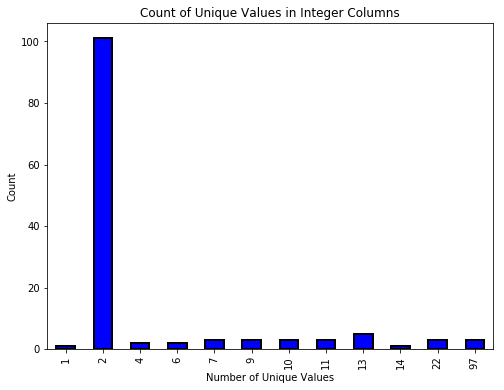

In [6]:
# Look at all columns that are integers to see how many are binary
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

In [7]:
# Look at number of nan's for integers, no nan's
pd.options.display.max_rows = 150
train.select_dtypes(np.int64).isna().sum().sort_index()

SQBage             0
SQBedjefe          0
SQBescolari        0
SQBhogar_nin       0
SQBhogar_total     0
Target             0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
age                0
agesq              0
area1              0
area2              0
bedrooms           0
cielorazo          0
computer           0
coopele            0
dis                0
elimbasu1          0
elimbasu2          0
elimbasu3          0
elimbasu4          0
elimbasu5          0
elimbasu6          0
energcocinar1      0
energcocinar2      0
energcocinar3      0
energcocinar4      0
epared1            0
epared2            0
epared3            0
escolari           0
estadocivil1       0
estadocivil2       0
estadocivil3       0
estadocivil4       0
estadocivil5       0
estadocivil6       0
estadocivil7       0
etecho1            0
etecho2            0
etecho3            0
eviv1              0
eviv2              0
eviv3              0
female             0
hacapo             0
hacdor       

In [8]:
# find number of na's in integers for test
test.select_dtypes(np.int64).isna().sum().sort_index()

SQBage             0
SQBedjefe          0
SQBescolari        0
SQBhogar_nin       0
SQBhogar_total     0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
age                0
agesq              0
area1              0
area2              0
bedrooms           0
cielorazo          0
computer           0
coopele            0
dis                0
elimbasu1          0
elimbasu2          0
elimbasu3          0
elimbasu4          0
elimbasu5          0
elimbasu6          0
energcocinar1      0
energcocinar2      0
energcocinar3      0
energcocinar4      0
epared1            0
epared2            0
epared3            0
escolari           0
estadocivil1       0
estadocivil2       0
estadocivil3       0
estadocivil4       0
estadocivil5       0
estadocivil6       0
estadocivil7       0
etecho1            0
etecho2            0
etecho3            0
eviv1              0
eviv2              0
eviv3              0
female             0
hacapo             0
hacdor             0
hhsize       

In [9]:
# find number of na's in floats for train
train.select_dtypes(np.float64).isna().sum().sort_index()

SQBdependency         0
SQBmeaned             5
SQBovercrowding       0
meaneduc              5
overcrowding          0
rez_esc            7928
v18q1              7342
v2a1               6860
dtype: int64

In [10]:
# find number of na's in floats for test
test.select_dtypes(np.float64).isna().sum().sort_index()

SQBdependency          0
SQBmeaned             31
SQBovercrowding        0
meaneduc              31
overcrowding           0
rez_esc            19653
v18q1              18126
v2a1               17403
dtype: int64

In [11]:
# find number of na's in obejcts for train
train.select_dtypes(object).isna().sum().sort_index()

Id            0
dependency    0
edjefa        0
edjefe        0
idhogar       0
dtype: int64

In [12]:
# find number of na's in obejcts for train
test.select_dtypes(object).isna().sum().sort_index()

Id            0
dependency    0
edjefa        0
edjefe        0
idhogar       0
dtype: int64

In [13]:
# Look at distribution of potential protected classes
#print(train.loc['parentesco1' == 1])
print(train['parentesco1'].mean())
print(train['male'].mean())
print(train.groupby(['male','parentesco1']).size())
print(train.groupby(['dis','parentesco1']).size())



0.31108088312231874
0.48341529768755886
male  parentesco1
0     0              3774
      1              1163
1     0              2810
      1              1810
dtype: int64
dis  parentesco1
0    0              6275
     1              2732
1    0               309
     1               241
dtype: int64


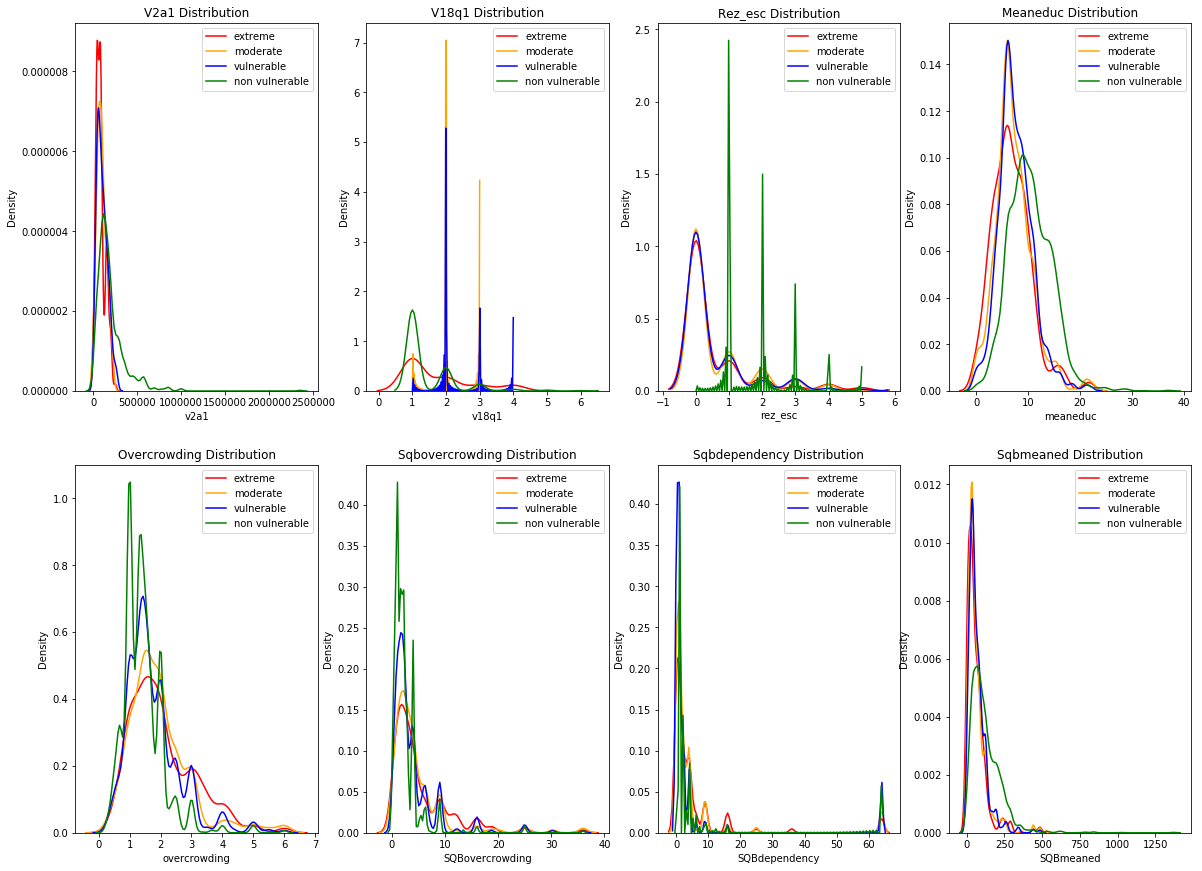

In [14]:
# plot distribution of all float values train
plt.figure(figsize = (20, 6))


# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(2, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

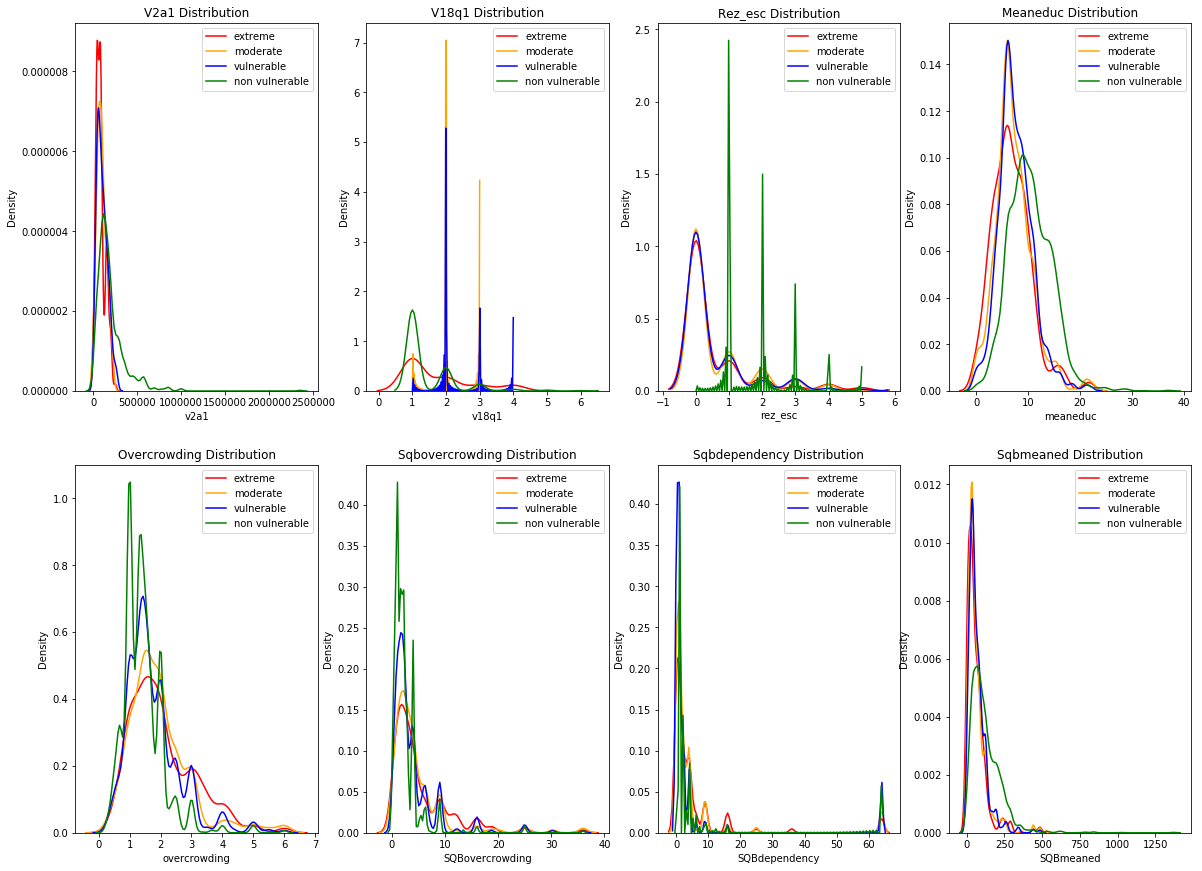

In [15]:
# plot distribution of all float values test
plt.figure(figsize = (20, 6))


# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(test.select_dtypes('float')):
    ax = plt.subplot(2, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [16]:
# look at list of all values for the object values
# looks like for the edjefa , edjefe features they are numbers with the additon of no and yes values

for i, col in enumerate(train.select_dtypes('object')):
    print(train.groupby(col)['Id'].nunique())

Id
ID_0005f1903    1
ID_000603f5e    1
ID_000694a57    1
ID_000b240d7    1
ID_000ba4f4f    1
ID_00186dde5    1
ID_001db8579    1
ID_001ed8ac7    1
ID_002242b5b    1
ID_0026ce239    1
ID_002c68c5a    1
ID_00379d6dd    1
ID_0040a7ea8    1
ID_004710494    1
ID_0049fa939    1
ID_005bd0747    1
ID_005cb39c3    1
ID_005dada23    1
ID_00629ddb2    1
ID_0063aa209    1
ID_00721ed96    1
ID_007309845    1
ID_008635054    1
ID_0087f7b1d    1
ID_00958797d    1
ID_009603cd8    1
ID_009ba9a39    1
ID_00a3edd2a    1
ID_00ad96fd1    1
ID_00b19f4f1    1
ID_00b3f6e91    1
ID_00b57e3ac    1
ID_00b7179b8    1
ID_00c5b02dd    1
ID_00da43675    1
ID_00e18b86c    1
ID_00e1a2af0    1
ID_00e338068    1
ID_00e5bb156    1
ID_00f84ddbf    1
ID_00f87485f    1
ID_0102dc04b    1
ID_010a9e5a9    1
ID_010c72f02    1
ID_012411ec3    1
ID_012685333    1
ID_012b0d963    1
ID_012bcdcc9    1
ID_012c91cfa    1
ID_01319aa12    1
ID_014151bdb    1
ID_01462b000    1
ID_0147c1e3a    1
ID_01493bddb    1
ID_014f6b533    1
ID_0160

In [17]:
# do same for rest
for i, col in enumerate(test.select_dtypes('object')):
    print(train.groupby(col)['Id'].nunique())

Id
ID_0005f1903    1
ID_000603f5e    1
ID_000694a57    1
ID_000b240d7    1
ID_000ba4f4f    1
ID_00186dde5    1
ID_001db8579    1
ID_001ed8ac7    1
ID_002242b5b    1
ID_0026ce239    1
ID_002c68c5a    1
ID_00379d6dd    1
ID_0040a7ea8    1
ID_004710494    1
ID_0049fa939    1
ID_005bd0747    1
ID_005cb39c3    1
ID_005dada23    1
ID_00629ddb2    1
ID_0063aa209    1
ID_00721ed96    1
ID_007309845    1
ID_008635054    1
ID_0087f7b1d    1
ID_00958797d    1
ID_009603cd8    1
ID_009ba9a39    1
ID_00a3edd2a    1
ID_00ad96fd1    1
ID_00b19f4f1    1
ID_00b3f6e91    1
ID_00b57e3ac    1
ID_00b7179b8    1
ID_00c5b02dd    1
ID_00da43675    1
ID_00e18b86c    1
ID_00e1a2af0    1
ID_00e338068    1
ID_00e5bb156    1
ID_00f84ddbf    1
ID_00f87485f    1
ID_0102dc04b    1
ID_010a9e5a9    1
ID_010c72f02    1
ID_012411ec3    1
ID_012685333    1
ID_012b0d963    1
ID_012bcdcc9    1
ID_012c91cfa    1
ID_01319aa12    1
ID_014151bdb    1
ID_01462b000    1
ID_0147c1e3a    1
ID_01493bddb    1
ID_014f6b533    1
ID_0160

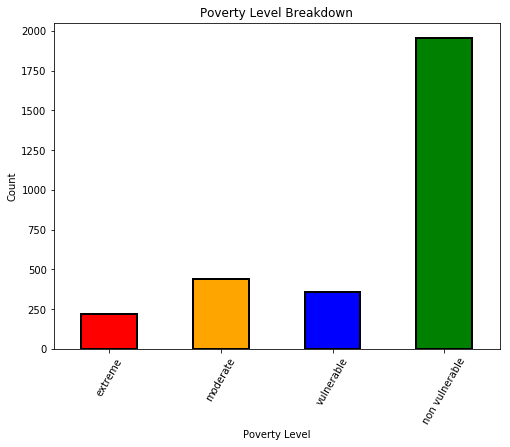

In [18]:
# look at break down of income classes for train, only for head of household!
# don't want to count multiple times for larger households

# Heads of household
heads = train.loc[train['parentesco1'] == 1].copy()

# Labels for training
train_labels = train.loc[(train['Target'].notnull()) & (train['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');


No handles with labels found to put in legend.


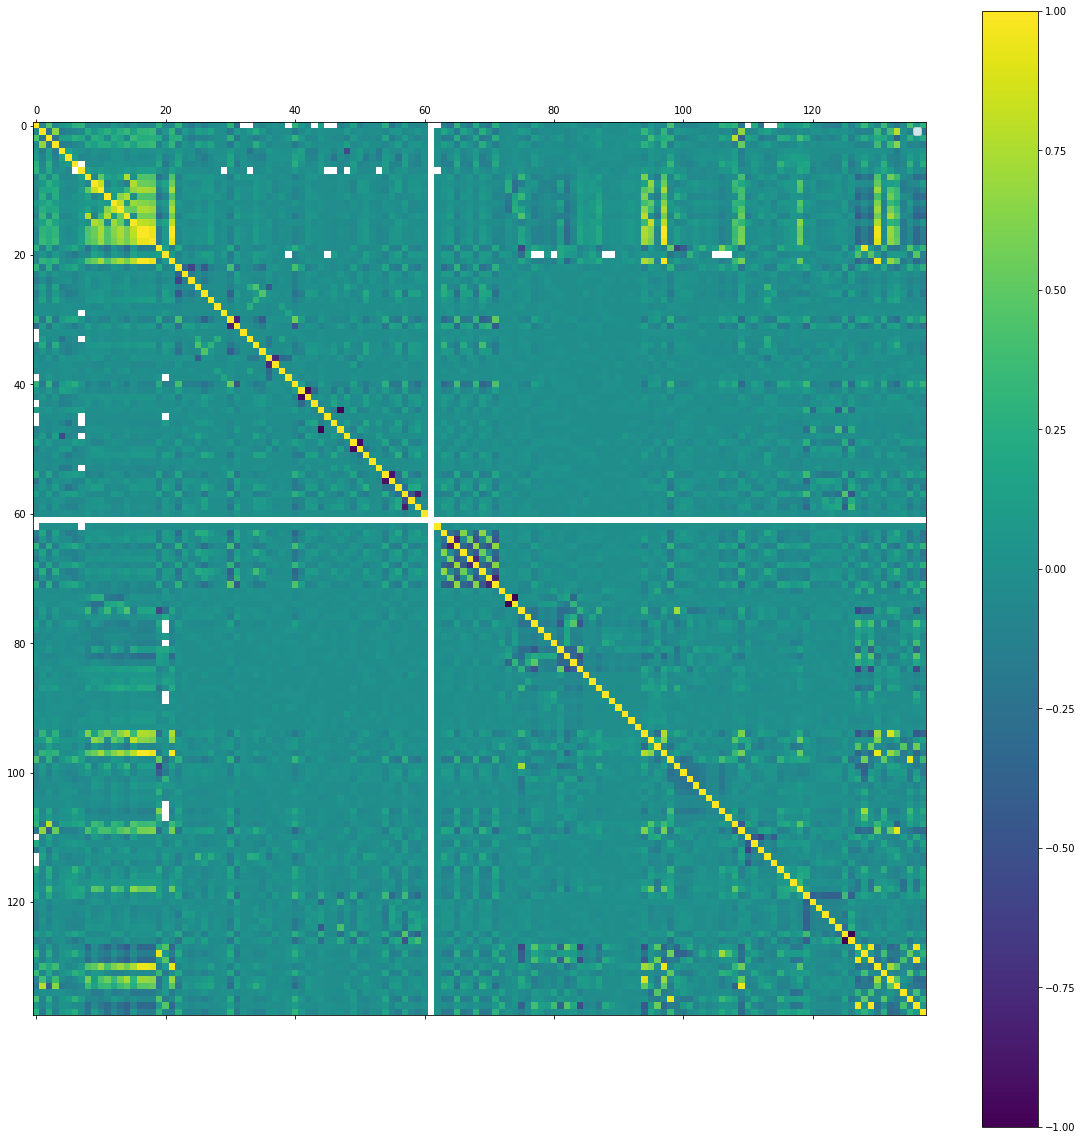

In [19]:
# Correlation plot for all data
plt.figure(figsize=(20,20))
plt.matshow(train.corr(), fignum=1)
plt.colorbar()
plt.legend()

No handles with labels found to put in legend.


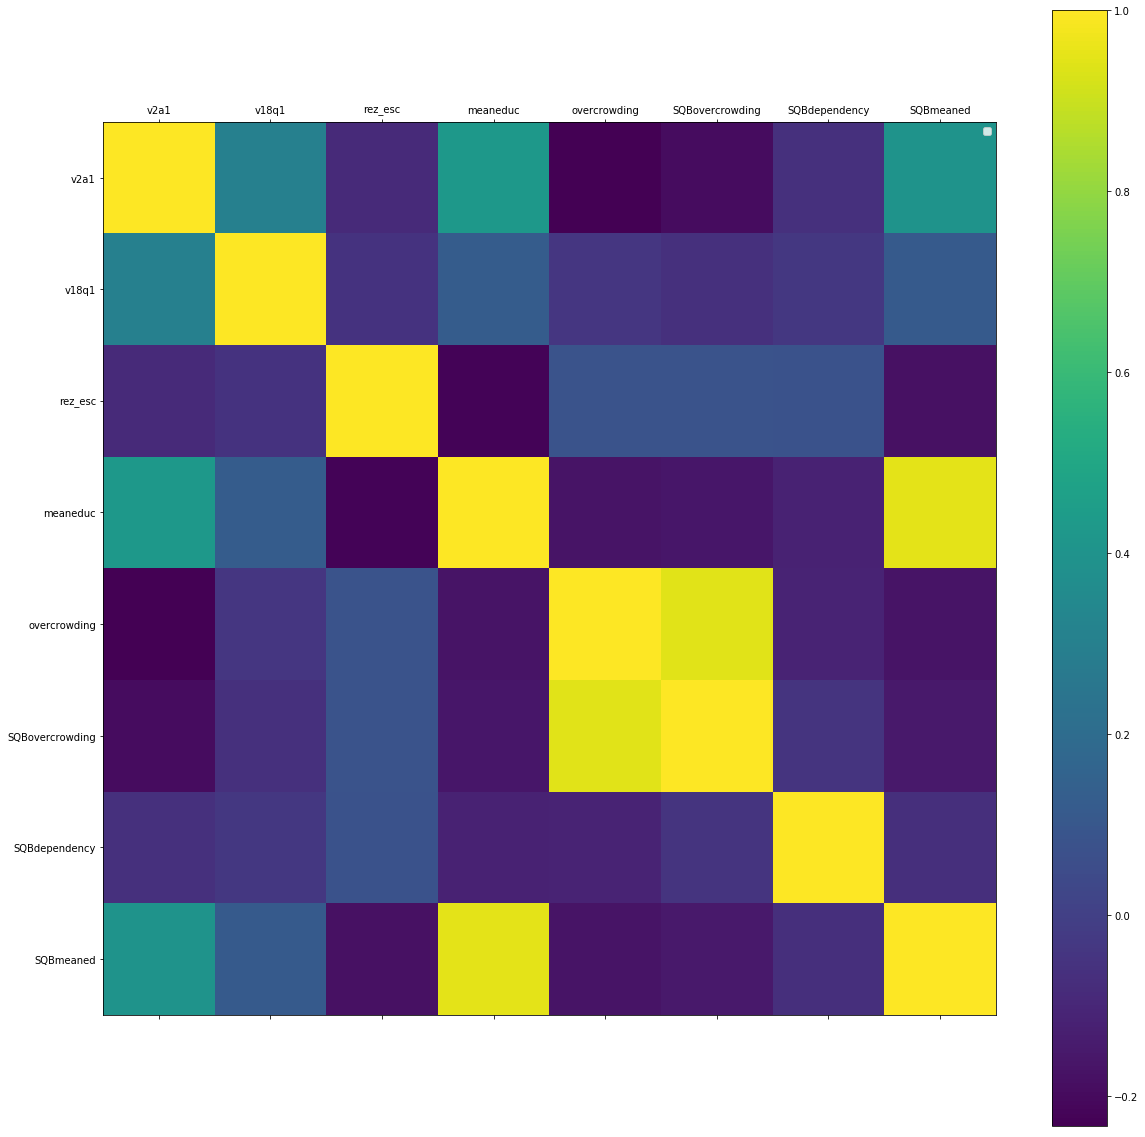

In [20]:
# Correlation plot for all integer data
alpha = train.select_dtypes(np.float64).columns

plt.figure(figsize=(20,20))
plt.matshow(train.select_dtypes(np.float64).corr(), fignum=1)
plt.colorbar()
plt.xticks(np.arange(0,len(alpha)), ['']+alpha)
plt.yticks(np.arange(0,len(alpha)), ['']+alpha)
plt.legend()

No handles with labels found to put in legend.


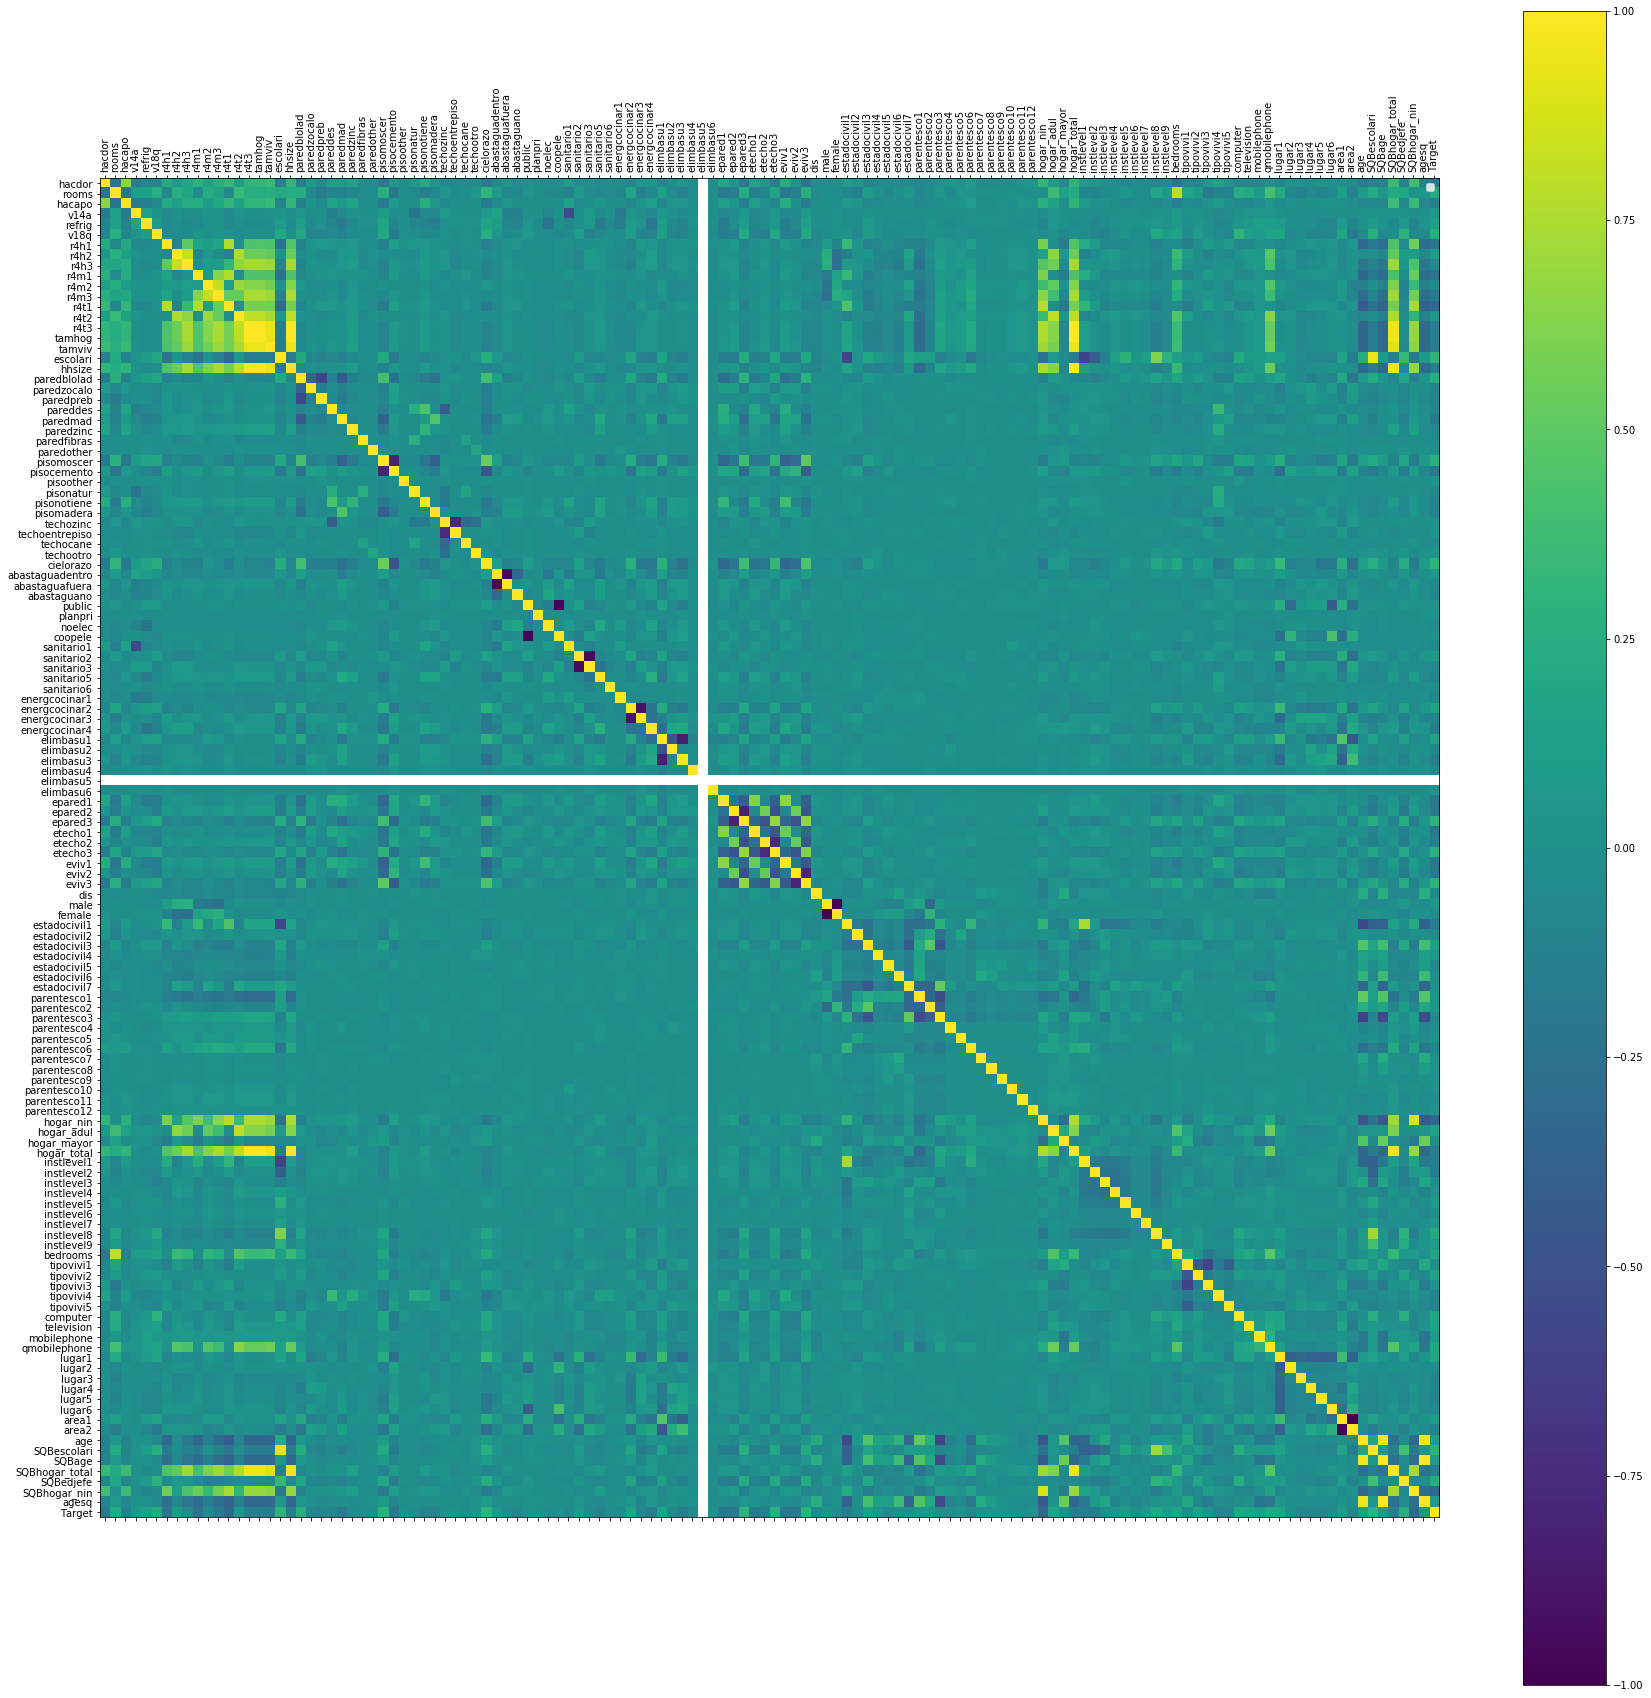

In [21]:
# Correlation plot for all integer data
alpha = train.select_dtypes(np.int64).columns

plt.figure(figsize=(30,30))
plt.matshow(train.select_dtypes(np.int64).corr(), fignum=1)
plt.colorbar()
plt.xticks(np.arange(0,len(alpha)), ['']+alpha, rotation = 'vertical')
plt.yticks(np.arange(0,len(alpha)), ['']+alpha)
plt.legend()

In [22]:
# only 1 value for elimbasu5
train['elimbasu5'].nunique()

1

In [23]:
# begin processing data for xgboost model
# this only transforms the idhogar field, the other things this function used to do are done elsewhere
def encode_data(df):
    df['idhogar'] = LabelEncoder().fit_transform(df['idhogar'])

# plot feature importance for sklearn decision trees    
def feature_importance(forest, X_train, display_results=True):
    ranked_list = []
    zero_features = []
    
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]
    
    if display_results:
        # Print the feature ranking
        print("Feature ranking:")

    for f in range(X_train.shape[1]):
        if display_results:
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]) + " - " + X_train.columns[indices[f]])
        
        ranked_list.append(X_train.columns[indices[f]])
        
        if importances[indices[f]] == 0.0:
            zero_features.append(X_train.columns[indices[f]])
            
    return ranked_list, zero_features


In [24]:
def do_features(df):
    feats_div = [('children_fraction', 'r4t1', 'r4t3'), 
                 ('working_man_fraction', 'r4h2', 'r4t3'),
                 ('all_man_fraction', 'r4h3', 'r4t3'),
                 ('human_density', 'tamviv', 'rooms'),
                 ('human_bed_density', 'tamviv', 'bedrooms'),
                 ('rent_per_person', 'v2a1', 'r4t3'),
                 ('rent_per_room', 'v2a1', 'rooms'),
                 ('mobile_density', 'qmobilephone', 'r4t3'),
                 ('tablet_density', 'v18q1', 'r4t3'),
                 ('mobile_adult_density', 'qmobilephone', 'r4t2'),
                 ('tablet_adult_density', 'v18q1', 'r4t2'),
                ]
    
    feats_sub = [('people_not_living', 'tamhog', 'tamviv'),
                 ('people_weird_stat', 'tamhog', 'r4t3')]

    for f_new, f1, f2 in feats_div:
        df['fe_' + f_new] = (df[f1] / df[f2]).astype(np.float32)       
    for f_new, f1, f2 in feats_sub:
        df['fe_' + f_new] = (df[f1] - df[f2]).astype(np.float32)
    
    # aggregation rules over household
    aggs_num = {'age': ['min', 'max', 'mean'],
                'escolari': ['min', 'max', 'mean']
               }
    
    aggs_cat = {'dis': ['mean']}
    for s_ in ['estadocivil', 'parentesco', 'instlevel']:
        for f_ in [f_ for f_ in df.columns if f_.startswith(s_)]:
            aggs_cat[f_] = ['mean', 'count']

    # aggregation over household
    for name_, df_ in [('18', df.query('age >= 18'))]:
        df_agg = df_.groupby('idhogar').agg({**aggs_num, **aggs_cat}).astype(np.float32)
        df_agg.columns = pd.Index(['agg' + name_ + '_' + e[0] + "_" + e[1].upper() for e in df_agg.columns.tolist()])
        df = df.join(df_agg, how='left', on='idhogar')
        del df_agg

    # Drop id's
    df.drop(['Id'], axis=1, inplace=True)
    
    return df

In [25]:
# convert one hot encoded fields to label encoding
def convert_OHE2LE(df):
    tmp_df = df.copy(deep=True)
    for s_ in ['pared', 'piso', 'techo', 'abastagua', 'sanitario', 'energcocinar', 'elimbasu', 
               'epared', 'etecho', 'eviv', 'estadocivil', 'parentesco', 
               'instlevel', 'lugar', 'tipovivi',
               'manual_elec']:
        if 'manual_' not in s_:
            cols_s_ = [f_ for f_ in df.columns if f_.startswith(s_)]
        elif 'elec' in s_:
            cols_s_ = ['public', 'planpri', 'noelec', 'coopele']
        sum_ohe = tmp_df[cols_s_].sum(axis=1).unique()
        #deal with those OHE, where there is a sum over columns == 0
        if 0 in sum_ohe:
            print('The OHE in {} is incomplete. A new column will be added before label encoding'
                  .format(s_))
            # dummy colmn name to be added
            col_dummy = s_+'_dummy'
            # add the column to the dataframe
            tmp_df[col_dummy] = (tmp_df[cols_s_].sum(axis=1) == 0).astype(np.int8)
            # add the name to the list of columns to be label-encoded
            cols_s_.append(col_dummy)
            # proof-check, that now the category is complete
            sum_ohe = tmp_df[cols_s_].sum(axis=1).unique()
            if 0 in sum_ohe:
                 print("The category completion did not work")
        tmp_cat = tmp_df[cols_s_].idxmax(axis=1)
        tmp_df[s_ + '_LE'] = LabelEncoder().fit_transform(tmp_cat).astype(np.int16)
        if 'parentesco1' in cols_s_:
            cols_s_.remove('parentesco1')
        tmp_df.drop(cols_s_, axis=1, inplace=True)
    return tmp_df

In [26]:
test_ids = test.Id

def process_df(df_):
    # encode the idhogar
    encode_data(df_)
    
    # create aggregate features
    return do_features(df_)

train = process_df(train)
test = process_df(test)

In [27]:
# some dependencies are Na, fill those with the square root of the square
train['dependency'] = np.sqrt(train['SQBdependency'])
test['dependency'] = np.sqrt(test['SQBdependency'])

# fill "no"s for education with 0s
train.loc[train['edjefa'] == "no", "edjefa"] = 0
train.loc[train['edjefe'] == "no", "edjefe"] = 0
test.loc[test['edjefa'] == "no", "edjefa"] = 0
test.loc[test['edjefe'] == "no", "edjefe"] = 0

# if education is "yes" and person is head of household, fill with escolari
train.loc[(train['edjefa'] == "yes") & (train['parentesco1'] == 1), "edjefa"] = train.loc[(train['edjefa'] == "yes") & (train['parentesco1'] == 1), "escolari"]
train.loc[(train['edjefe'] == "yes") & (train['parentesco1'] == 1), "edjefe"] = train.loc[(train['edjefe'] == "yes") & (train['parentesco1'] == 1), "escolari"]

test.loc[(test['edjefa'] == "yes") & (test['parentesco1'] == 1), "edjefa"] = test.loc[(test['edjefa'] == "yes") & (test['parentesco1'] == 1), "escolari"]
test.loc[(test['edjefe'] == "yes") & (test['parentesco1'] == 1), "edjefe"] = test.loc[(test['edjefe'] == "yes") & (test['parentesco1'] == 1), "escolari"]

# this field is supposed to be interaction between gender and escolari, but it isn't clear what "yes" means, let's fill it with 4
train.loc[train['edjefa'] == "yes", "edjefa"] = 4
train.loc[train['edjefe'] == "yes", "edjefe"] = 4

test.loc[test['edjefa'] == "yes", "edjefa"] = 4
test.loc[test['edjefe'] == "yes", "edjefe"] = 4

# convert to int for our models
train['edjefe'] = train['edjefe'].astype("int")
train['edjefa'] = train['edjefa'].astype("int")
test['edjefe'] = test['edjefe'].astype("int")
test['edjefa'] = test['edjefa'].astype("int")

# create feature with max education of either head of household
train['edjef'] = np.max(train[['edjefa','edjefe']], axis=1)
test['edjef'] = np.max(test[['edjefa','edjefe']], axis=1)

# fill some nas
train['v2a1']=train['v2a1'].fillna(0)
test['v2a1']=test['v2a1'].fillna(0)

test['v18q1']=test['v18q1'].fillna(0)
train['v18q1']=train['v18q1'].fillna(0)

train['rez_esc']=train['rez_esc'].fillna(0)
test['rez_esc']=test['rez_esc'].fillna(0)

train.loc[train.meaneduc.isnull(), "meaneduc"] = 0
train.loc[train.SQBmeaned.isnull(), "SQBmeaned"] = 0

test.loc[test.meaneduc.isnull(), "meaneduc"] = 0
test.loc[test.SQBmeaned.isnull(), "SQBmeaned"] = 0

# fix some inconsistencies in the data - some rows indicate both that the household does and does not have a toilet, 
# if there is no water we'll assume they do not
train.loc[(train.v14a ==  1) & (train.sanitario1 ==  1) & (train.abastaguano == 0), "v14a"] = 0
train.loc[(train.v14a ==  1) & (train.sanitario1 ==  1) & (train.abastaguano == 0), "sanitario1"] = 0

test.loc[(test.v14a ==  1) & (test.sanitario1 ==  1) & (test.abastaguano == 0), "v14a"] = 0
test.loc[(test.v14a ==  1) & (test.sanitario1 ==  1) & (test.abastaguano == 0), "sanitario1"] = 0

In [28]:
def train_test_apply_func(train_, test_, func_):
    test_['Target'] = 0
    xx = pd.concat([train_, test_])

    xx_func = func_(xx)
    train_ = xx_func.iloc[:train_.shape[0], :]
    test_  = xx_func.iloc[train_.shape[0]:, :].drop('Target', axis=1)

    del xx, xx_func
    return train_, test_

In [29]:
train, test = train_test_apply_func(train, test, convert_OHE2LE)

/anaconda/envs/responsible/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


The OHE in techo is incomplete. A new column will be added before label encoding
The OHE in instlevel is incomplete. A new column will be added before label encoding
The OHE in manual_elec is incomplete. A new column will be added before label encoding


In [30]:
cols_2_ohe = ['eviv_LE', 'etecho_LE', 'epared_LE', 'elimbasu_LE', 
              'energcocinar_LE', 'sanitario_LE', 'manual_elec_LE',
              'pared_LE']
cols_nums = ['age', 'meaneduc', 'dependency', 
             'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total',
             'bedrooms', 'overcrowding']

def convert_geo2aggs(df_):
    tmp_df = pd.concat([df_[(['lugar_LE', 'idhogar']+cols_nums)],
                        pd.get_dummies(df_[cols_2_ohe], 
                                       columns=cols_2_ohe)],axis=1)

    geo_agg = tmp_df.groupby(['lugar_LE','idhogar']).mean().groupby('lugar_LE').mean().astype(np.float32)
    geo_agg.columns = pd.Index(['geo_' + e for e in geo_agg.columns.tolist()])
    
    del tmp_df
    return df_.join(geo_agg, how='left', on='lugar_LE')

# add some aggregates by geography
train, test = train_test_apply_func(train, test, convert_geo2aggs)

/anaconda/envs/responsible/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# add the number of people over 18 in each household
train['num_over_18'] = 0
train['num_over_18'] = train[train.age >= 18].groupby('idhogar').transform("count")
train['num_over_18'] = train.groupby("idhogar")["num_over_18"].transform("max")
train['num_over_18'] = train['num_over_18'].fillna(0)

test['num_over_18'] = 0
test['num_over_18'] = test[test.age >= 18].groupby('idhogar').transform("count")
test['num_over_18'] = test.groupby("idhogar")["num_over_18"].transform("max")
test['num_over_18'] = test['num_over_18'].fillna(0)

# add some extra features, these were taken from another kernel
def extract_features(df):
    df['bedrooms_to_rooms'] = df['bedrooms']/df['rooms']
    df['rent_to_rooms'] = df['v2a1']/df['rooms']
    df['tamhog_to_rooms'] = df['tamhog']/df['rooms'] # tamhog - size of the household
    df['r4t3_to_tamhog'] = df['r4t3']/df['tamhog'] # r4t3 - Total persons in the household
    df['r4t3_to_rooms'] = df['r4t3']/df['rooms'] # r4t3 - Total persons in the household
    df['v2a1_to_r4t3'] = df['v2a1']/df['r4t3'] # rent to people in household
    df['v2a1_to_r4t3'] = df['v2a1']/(df['r4t3'] - df['r4t1']) # rent to people under age 12
    df['hhsize_to_rooms'] = df['hhsize']/df['rooms'] # rooms per person
    df['rent_to_hhsize'] = df['v2a1']/df['hhsize'] # rent to household size
    df['rent_to_over_18'] = df['v2a1']/df['num_over_18']
    # some households have no one over 18, use the total rent for those
    df.loc[df.num_over_18 == 0, "rent_to_over_18"] = df[df.num_over_18 == 0].v2a1
    
extract_features(train)    
extract_features(test)  

In [32]:
# drop duplicated columns
needless_cols = ['r4t3', 'tamhog', 'tamviv', 'hhsize', 'v18q', 'v14a', 'agesq',
                 'mobilephone', 'female', ]

instlevel_cols = [s for s in train.columns.tolist() if 'instlevel' in s]

needless_cols.extend(instlevel_cols)

train = train.drop(needless_cols, axis=1)
test = test.drop(needless_cols, axis=1)


In [33]:
def split_data(train, y, sample_weight=None, households=None, test_percentage=0.20, seed=None):
    # uncomment for extra randomness
#     np.random.seed(seed=seed)
    
    train2 = train.copy()
    
    # pick some random households to use for the test data
    cv_hhs = np.random.choice(households, size=int(len(households) * test_percentage), replace=False)
    
    # select households which are in the random selection
    cv_idx = np.isin(households, cv_hhs)
    X_test = train2[cv_idx]
    y_test = y[cv_idx]

    X_train = train2[~cv_idx]
    y_train = y[~cv_idx]
    
    if sample_weight is not None:
        y_train_weights = sample_weight[~cv_idx]
        return X_train, y_train, X_test, y_test, y_train_weights
    
    return X_train, y_train, X_test, y_test


In [34]:
X = train.query('parentesco1==1')
# X = train.copy()

# pull out and drop the target variable
y = X['Target'] - 1
X = X.drop(['Target'], axis=1)

np.random.seed(seed=None)

train2 = X.copy()

train_hhs = train2.idhogar

households = train2.idhogar.unique()
cv_hhs = np.random.choice(households, size=int(len(households) * 0.15), replace=False)

cv_idx = np.isin(train2.idhogar, cv_hhs)

X_test = train2[cv_idx]
y_test = y[cv_idx]

X_train = train2[~cv_idx]
y_train = y[~cv_idx]

# train on entire dataset
X_train = train2
y_train = y

train_households = X_train.idhogar


In [35]:
# figure out the class weights for training with unbalanced classes
y_train_weights = class_weight.compute_sample_weight('balanced', y_train, indices=None)

In [36]:
# drop some features which aren't used by the LGBM or have very low importance
extra_drop_features = [
 'agg18_estadocivil1_MEAN',
 'agg18_estadocivil6_COUNT',
 'agg18_estadocivil7_COUNT',
 'agg18_parentesco10_COUNT',
 'agg18_parentesco11_COUNT',
 'agg18_parentesco12_COUNT',
 'agg18_parentesco1_COUNT',
 'agg18_parentesco2_COUNT',
 'agg18_parentesco3_COUNT',
 'agg18_parentesco4_COUNT',
 'agg18_parentesco5_COUNT',
 'agg18_parentesco6_COUNT',
 'agg18_parentesco7_COUNT',
 'agg18_parentesco8_COUNT',
 'agg18_parentesco9_COUNT',
 'geo_elimbasu_LE_4',
 'geo_energcocinar_LE_1',
 'geo_energcocinar_LE_2',
 'geo_epared_LE_0',
 'geo_hogar_mayor',
 'geo_manual_elec_LE_2',
 'geo_pared_LE_3',
 'geo_pared_LE_4',
 'geo_pared_LE_5',
 'geo_pared_LE_6',
 'num_over_18',
 'parentesco_LE',
 'rez_esc']

In [37]:
xgb_drop_cols = extra_drop_features + ["idhogar",  'parentesco1']

In [38]:
# some stats for features used by the classifer
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 9552
Columns: 175 entries, SQBage to rent_to_over_18
dtypes: float32(104), float64(19), int16(15), int64(37)
memory usage: 2.6 MB


In [39]:
# This is like a train, val split
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 2 to 9534
Columns: 175 entries, SQBage to rent_to_over_18
dtypes: float32(104), float64(19), int16(15), int64(37)
memory usage: 392.0 KB


In [40]:
# number of na's
pd.options.display.max_rows = 200
X_train.isna().sum().sort_index()

SQBage                         0
SQBdependency                  0
SQBedjefe                      0
SQBescolari                    0
SQBhogar_nin                   0
SQBhogar_total                 0
SQBmeaned                      0
SQBovercrowding                0
abastagua_LE                   0
age                            0
agg18_age_MAX                  0
agg18_age_MEAN                 0
agg18_age_MIN                  0
agg18_dis_MEAN                 0
agg18_escolari_MAX             0
agg18_escolari_MEAN            0
agg18_escolari_MIN             0
agg18_estadocivil1_COUNT       0
agg18_estadocivil1_MEAN        0
agg18_estadocivil2_COUNT       0
agg18_estadocivil2_MEAN        0
agg18_estadocivil3_COUNT       0
agg18_estadocivil3_MEAN        0
agg18_estadocivil4_COUNT       0
agg18_estadocivil4_MEAN        0
agg18_estadocivil5_COUNT       0
agg18_estadocivil5_MEAN        0
agg18_estadocivil6_COUNT       0
agg18_estadocivil6_MEAN        0
agg18_estadocivil7_COUNT       0
agg18_esta

In [41]:
# number of na's
# 15 in actual test data
test.isna().sum().sort_index()

SQBage                          0
SQBdependency                   0
SQBedjefe                       0
SQBescolari                     0
SQBhogar_nin                    0
SQBhogar_total                  0
SQBmeaned                       0
SQBovercrowding                 0
abastagua_LE                    0
age                             0
agg18_age_MAX                  15
agg18_age_MEAN                 15
agg18_age_MIN                  15
agg18_dis_MEAN                 15
agg18_escolari_MAX             15
agg18_escolari_MEAN            15
agg18_escolari_MIN             15
agg18_estadocivil1_COUNT       15
agg18_estadocivil1_MEAN        15
agg18_estadocivil2_COUNT       15
agg18_estadocivil2_MEAN        15
agg18_estadocivil3_COUNT       15
agg18_estadocivil3_MEAN        15
agg18_estadocivil4_COUNT       15
agg18_estadocivil4_MEAN        15
agg18_estadocivil5_COUNT       15
agg18_estadocivil5_MEAN        15
agg18_estadocivil6_COUNT       15
agg18_estadocivil6_MEAN        15
agg18_estadoci

In [42]:
'''further on feature importance is calculated, 
but we will use the top 10 features here to delve deeper into those variables
Feature ranking:
1. feature 11 (0.057015) - agg18_age_MEAN
2. feature 0 (0.044951) - SQBage
3. feature 10 (0.037019) - agg18_age_MAX
4. feature 12 (0.036358) - agg18_age_MIN
5. feature 15 (0.034374) - agg18_escolari_MEAN
6. feature 6 (0.034044) - SQBmeaned
7. feature 14 (0.024624) - agg18_escolari_MAX
8. feature 65 (0.022310) - fe_rent_per_person
9. feature 3 (0.021815) - SQBescolari
10. feature 1 (0.021154) - SQBdependency
'''
top_feature_list = ["agg18_age_MEAN",
                    "SQBage",
                     "agg18_age_MAX",
                     "agg18_age_MIN",
                     "agg18_escolari_MEAN",
                    "SQBmeaned",
                     "agg18_escolari_MAX",
                     "fe_rent_per_person",
                    "SQBescolari",
                     "SQBdependency"]


Feature: agg18_age_MEAN, Number of NA's: 0


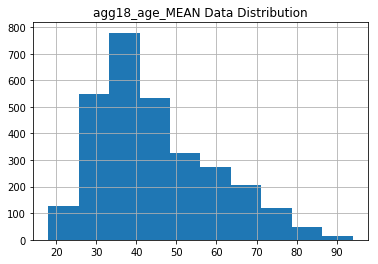

Feature: SQBage, Number of NA's: 0


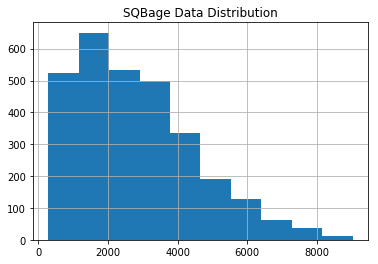

Feature: agg18_age_MAX, Number of NA's: 0


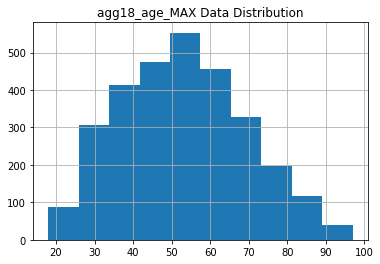

Feature: agg18_age_MIN, Number of NA's: 0


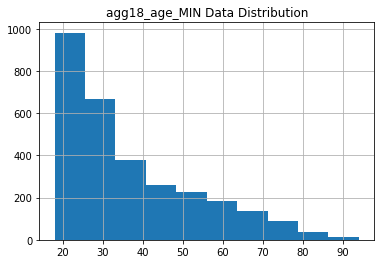

Feature: agg18_escolari_MEAN, Number of NA's: 0


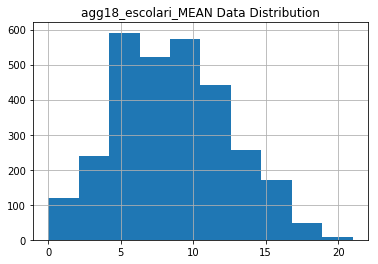

Feature: SQBmeaned, Number of NA's: 0


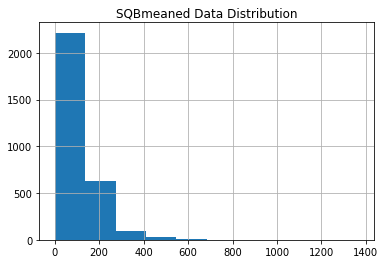

Feature: agg18_escolari_MAX, Number of NA's: 0


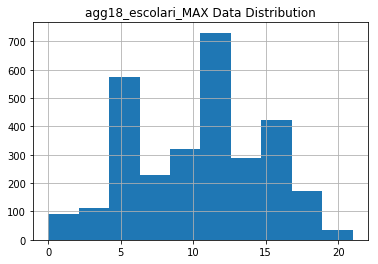

Feature: fe_rent_per_person, Number of NA's: 2156


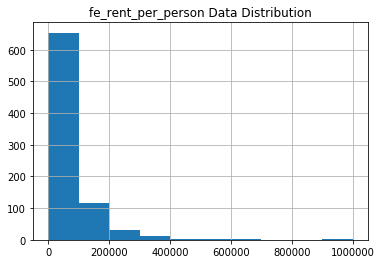

Feature: SQBescolari, Number of NA's: 0


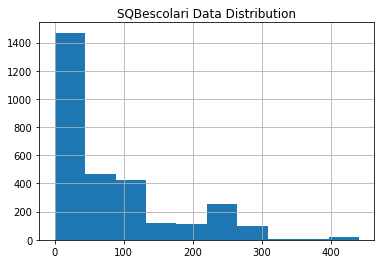

Feature: SQBdependency, Number of NA's: 0


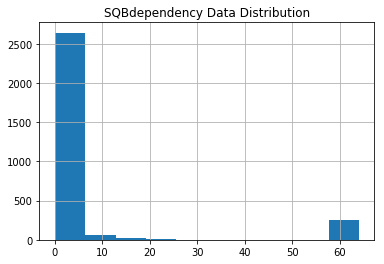

In [43]:
for i in top_feature_list:
    print("Feature: {}, Number of NA's: {}".format(i, X_train[i].isna().sum()))
    X_train[i].hist()
    plt.title("{} Data Distribution".format(i))
    plt.show()

In [44]:
# Show correlation of these features + target
df_corr = pd.DataFrame(X_train[top_feature_list])
df_corr['target'] =y_train
df_corr.shape

(2973, 11)

No handles with labels found to put in legend.


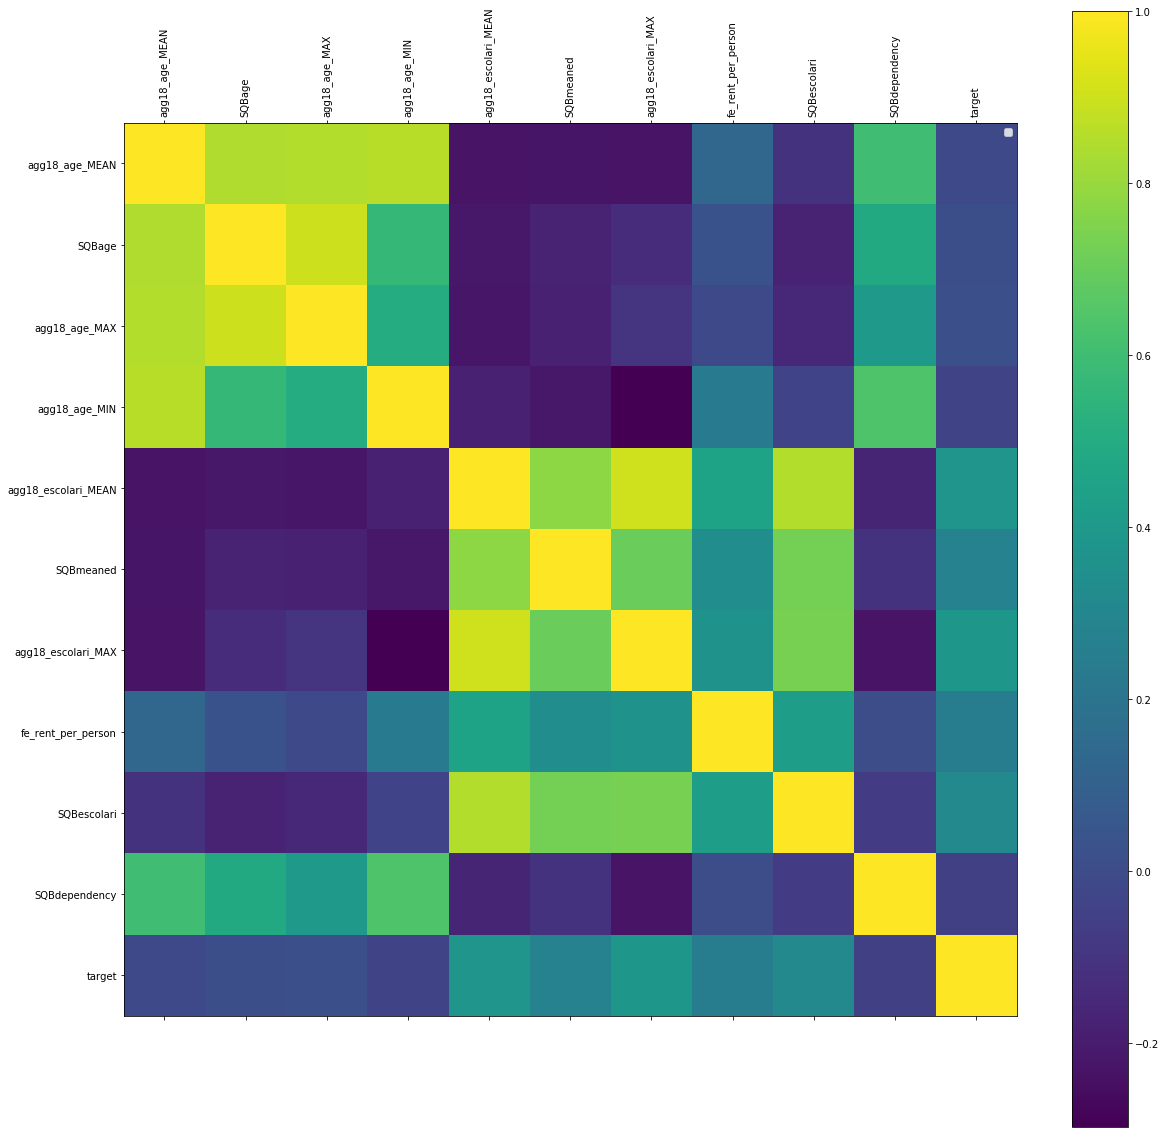

In [45]:
# Correlation plot for 10 most important features + target
alpha = df_corr.columns

plt.figure(figsize=(20,20))
plt.matshow(df_corr.corr(), fignum=1)
plt.colorbar()
plt.xticks(np.arange(0,len(alpha)), ['']+alpha, rotation = 'vertical')
plt.yticks(np.arange(0,len(alpha)), ['']+alpha)
plt.legend()

## Model Training
Most of the model training machinery itself is adapted from the xgboost notebook in the Kaggle kernel shown above

In [46]:
import numpy as np # linear algebra
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.externals.joblib import Parallel, delayed
from sklearn.base import clone
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings("ignore")

#fix
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [47]:
# 4
opt_parameters = {'max_depth':35, 'eta':0.1, 'silent':0, 'objective':'multi:softmax', 'min_child_weight': 1, 'num_class': 4, 'gamma': 2.0, 'colsample_bylevel': 0.9, 'subsample': 0.84, 'colsample_bytree': 0.88, 'reg_lambda': 0.40 }
# 5
opt_parameters = {'max_depth':35, 'eta':0.15, 'silent':1, 'objective':'multi:softmax', 'min_child_weight': 2, 'num_class': 4, 'gamma': 2.5, 'colsample_bylevel': 1, 'subsample': 0.95, 'colsample_bytree': 0.85, 'reg_lambda': 0.35 }
# 6
# opt_parameters = {'max_depth':35, 'eta':0.15, 'silent':0, 'objective':'multi:softmax', 'min_child_weight': 2, 'num_class': 4, 'gamma': 2.75, 'colsample_bylevel': 0.95, 'subsample': 0.95, 'colsample_bytree': 0.85, 'reg_lambda': 0.35 }
# # 7
# opt_parameters = {'max_depth':35, 'eta':0.12, 'silent':0, 'objective':'multi:softmax', 'min_child_weight': 2, 'num_class': 4, 'gamma': 3.25, 'colsample_bylevel': 0.95, 'subsample': 0.88, 'colsample_bytree': 0.88, 'reg_lambda': 0.35 }

def evaluate_macroF1_lgb(predictions, truth):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.argmax(axis=1)
    truth = truth.get_label()
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', 1-f1) 

fit_params={"early_stopping_rounds":500,
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [(X_train,y_train), (X_test,y_test)],
            'verbose': False,
           }

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.995, current_iter)
    return max(lr, min_learning_rate)

fit_params['verbose'] = 50

In [48]:
np.random.seed(100)

def _parallel_fit_estimator(estimator1, X, y, sample_weight=None, threshold=True, **fit_params):
    estimator = clone(estimator1)
    
    # randomly split the data so we have a test set for early stopping
    if sample_weight is not None:
        X_train, y_train, X_test, y_test, y_train_weight = split_data(X, y, sample_weight, households=train_households)
    else:
        X_train, y_train, X_test, y_test = split_data(X, y, None, households=train_households)
        
    # update the fit params with our new split
    fit_params["eval_set"] = [(X_test,y_test)]
    
    # fit the estimator
    if sample_weight is not None:
        if isinstance(estimator1, ExtraTreesClassifier) or isinstance(estimator1, RandomForestClassifier):
            estimator.fit(X_train, y_train)
        else:
            _ = estimator.fit(X_train, y_train, sample_weight=y_train_weight, **fit_params)
    else:
        if isinstance(estimator1, ExtraTreesClassifier) or isinstance(estimator1, RandomForestClassifier):
            estimator.fit(X_train, y_train)
        else:
            _ = estimator.fit(X_train, y_train, **fit_params)
    
    if not isinstance(estimator1, ExtraTreesClassifier) and not isinstance(estimator1, RandomForestClassifier) and not isinstance(estimator1, xgb.XGBClassifier):
        best_cv_round = np.argmax(estimator.evals_result_['validation_0']['mlogloss'])
        best_cv = np.max(estimator.evals_result_['validation_0']['mlogloss'])
        best_train = estimator.evals_result_['train']['macroF1'][best_cv_round]
    else:
        best_train = f1_score(y_train, estimator.predict(X_train), average="macro")
        best_cv = f1_score(y_test, estimator.predict(X_test), average="macro")
        print("Train F1:", best_train)
        print("Test F1:", best_cv)
        
    # reject some estimators based on their performance on train and test sets
    if threshold:
        # if the valid score is very high we'll allow a little more leeway with the train scores
        if ((best_cv > 0.37) and (best_train > 0.75)) or ((best_cv > 0.44) and (best_train > 0.65)):
            return estimator

        # else recurse until we get a better one
        else:
            print("Unacceptable!!! Trying again...")
            return _parallel_fit_estimator(estimator1, X, y, sample_weight=sample_weight, **fit_params)
    
    else:
        return estimator
    
class VotingClassifierLGBM(VotingClassifier):
    '''
    This implements the fit method of the VotingClassifier propagating fit_params
    '''
    def fit(self, X, y, sample_weight=None, threshold=True, **fit_params):
        
        if isinstance(y, np.ndarray) and len(y.shape) > 1 and y.shape[1] > 1:
            raise NotImplementedError('Multilabel and multi-output'
                                      ' classification is not supported.')

        if self.voting not in ('soft', 'hard'):
            raise ValueError("Voting must be 'soft' or 'hard'; got (voting=%r)"
                             % self.voting)

        if self.estimators is None or len(self.estimators) == 0:
            raise AttributeError('Invalid `estimators` attribute, `estimators`'
                                 ' should be a list of (string, estimator)'
                                 ' tuples')

        if (self.weights is not None and
                len(self.weights) != len(self.estimators)):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d estimators'
                             % (len(self.weights), len(self.estimators)))

        names, clfs = zip(*self.estimators)
        self._validate_names(names)

        n_isnone = np.sum([clf is None for _, clf in self.estimators])
        if n_isnone == len(self.estimators):
            raise ValueError('All estimators are None. At least one is '
                             'required to be a classifier!')

        self.le_ = LabelEncoder().fit(y)
        self.classes_ = self.le_.classes_
        self.estimators_ = []

        transformed_y = self.le_.transform(y)

        self.estimators_ = Parallel(n_jobs=self.n_jobs)(
                delayed(_parallel_fit_estimator)(clone(clf), X, transformed_y,
                                                 sample_weight=sample_weight, threshold=threshold, **fit_params)
                for clf in clfs if clf is not None)

        return self

In [49]:
clfs = []
for i in range(15):
    clf = xgb.XGBClassifier(random_state=217+i, n_estimators=300, learning_rate=0.15, n_jobs=4, **opt_parameters)
    
    clfs.append(('xgb{}'.format(i), clf))
    
vc = VotingClassifierLGBM(clfs, voting='soft')
del(clfs)

#Train the final model with learning rate decay
_ = vc.fit(X_train.drop(xgb_drop_cols, axis=1), y_train, sample_weight=y_train_weights, threshold=False, **fit_params)

clf_final = vc.estimators_[0]

[0]	validation_0-merror:0.452862	validation_0-macroF1:0.640025
Multiple eval metrics have been passed: 'validation_0-macroF1' will be used for early stopping.

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.373737	validation_0-macroF1:0.586079
[100]	validation_0-merror:0.37037	validation_0-macroF1:0.589045
[150]	validation_0-merror:0.361953	validation_0-macroF1:0.585206
[200]	validation_0-merror:0.37037	validation_0-macroF1:0.59426
[250]	validation_0-merror:0.37037	validation_0-macroF1:0.596327
[299]	validation_0-merror:0.368687	validation_0-macroF1:0.595017
Train F1: 0.9105288790860586
Test F1: 0.4402031656915636
[0]	validation_0-merror:0.457912	validation_0-macroF1:0.641119
Multiple eval metrics have been passed: 'validation_0-macroF1' will be used for early stopping.

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.402357	validation_0-macroF1:0.600201
[100]	validation_0-merror:0.393939	v

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.39899	validation_0-macroF1:0.601832
[100]	validation_0-merror:0.392256	validation_0-macroF1:0.603489
[150]	validation_0-merror:0.388889	validation_0-macroF1:0.598141
[200]	validation_0-merror:0.383838	validation_0-macroF1:0.593239
[250]	validation_0-merror:0.390572	validation_0-macroF1:0.603535
[299]	validation_0-merror:0.383838	validation_0-macroF1:0.593239
Train F1: 0.8888914375762781
Test F1: 0.4292551539277151
[0]	validation_0-merror:0.46633	validation_0-macroF1:0.647117
Multiple eval metrics have been passed: 'validation_0-macroF1' will be used for early stopping.

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.388889	validation_0-macroF1:0.57931
[100]	validation_0-merror:0.387205	validation_0-macroF1:0.589036
[150]	validation_0-merror:0.388889	validation_0-macroF1:0.58807
[200]	validation_0-merror:0.388889	validation_0-macroF1:0.582531
[

In [50]:
et_drop_cols = ['agg18_age_MAX', 'agg18_age_MEAN', 'agg18_age_MIN', 'agg18_dis_MEAN',
       'agg18_escolari_MAX', 'agg18_escolari_MEAN', 'agg18_escolari_MIN',
       'agg18_estadocivil1_COUNT', 'agg18_estadocivil1_MEAN',
       'agg18_estadocivil2_COUNT', 'agg18_estadocivil2_MEAN',
       'agg18_estadocivil3_COUNT', 'agg18_estadocivil3_MEAN',
       'agg18_estadocivil4_COUNT', 'agg18_estadocivil4_MEAN',
       'agg18_estadocivil5_COUNT', 'agg18_estadocivil5_MEAN',
       'agg18_estadocivil6_COUNT', 'agg18_estadocivil6_MEAN',
       'agg18_estadocivil7_COUNT', 'agg18_estadocivil7_MEAN',
       'agg18_parentesco10_COUNT', 'agg18_parentesco10_MEAN',
       'agg18_parentesco11_COUNT', 'agg18_parentesco11_MEAN',
       'agg18_parentesco12_COUNT', 'agg18_parentesco12_MEAN',
       'agg18_parentesco1_COUNT', 'agg18_parentesco1_MEAN',
       'agg18_parentesco2_COUNT', 'agg18_parentesco2_MEAN',
       'agg18_parentesco3_COUNT', 'agg18_parentesco3_MEAN',
       'agg18_parentesco4_COUNT', 'agg18_parentesco4_MEAN',
       'agg18_parentesco5_COUNT', 'agg18_parentesco5_MEAN',
       'agg18_parentesco6_COUNT', 'agg18_parentesco6_MEAN',
       'agg18_parentesco7_COUNT', 'agg18_parentesco7_MEAN',
       'agg18_parentesco8_COUNT', 'agg18_parentesco8_MEAN',
       'agg18_parentesco9_COUNT', 'agg18_parentesco9_MEAN'] #+ ['parentesco_LE', 'rez_esc']

et_drop_cols.extend(["idhogar", "parentesco1", 'fe_rent_per_person', 'fe_rent_per_room',
       'fe_tablet_adult_density', 'fe_tablet_density'])

In [51]:
# do the same thing for some extra trees classifiers
ets = []    
for i in range(10):
    rf = RandomForestClassifier(max_depth=None, random_state=217+i, n_jobs=4, n_estimators=700, min_impurity_decrease=1e-3, min_samples_leaf=2, verbose=0, class_weight="balanced")
    ets.append(('rf{}'.format(i), rf))   

vc2 = VotingClassifierLGBM(ets, voting='soft')    
_ = vc2.fit(X_train.drop(et_drop_cols, axis=1), y_train, threshold=False)    

Train F1: 0.8973744577845608
Test F1: 0.4119287284836981
Train F1: 0.8973405328848642
Test F1: 0.4044941482768548
Train F1: 0.8880139756454893
Test F1: 0.39881107834328067
Train F1: 0.891769612996069
Test F1: 0.43265498149713966
Train F1: 0.8921492656245431
Test F1: 0.452800720791523
Train F1: 0.8938989965907618
Test F1: 0.43800331626520606
Train F1: 0.8967698827248772
Test F1: 0.4109323467334529
Train F1: 0.8906362327579868
Test F1: 0.45892004679838216
Train F1: 0.9006816627520686
Test F1: 0.42879021233275155
Train F1: 0.8971414961089192
Test F1: 0.41035647077305115


In [52]:
def combine_voters(data, weights=[0.5, 0.5]):
    # do soft voting with both classifiers
    vc.voting="soft"
    vc1_probs = vc.predict_proba(data.drop(xgb_drop_cols, axis=1))
    vc2.voting="soft"
    vc2_probs = vc2.predict_proba(data.drop(et_drop_cols, axis=1))
    
    final_vote = (vc1_probs * weights[0]) + (vc2_probs * weights[1])
    predictions = np.argmax(final_vote, axis=1)
    
    return predictions

## Fairness Metrics
Due to household aggregation, concatenating a validation set on the raw data would require significantly rewriting the model. Instead, compute 5 GBT in the same manner as the model, compute MI and binary odds for each, and average.

Unfortunatly, was unable to get this working by the project deadline.  Because of the entangled nature of the preprocessing and the data due to collapsing households, it required significantly taking apart the model to actually have access to a useful validation set.  The two options were:

1. Build a new Voting Classifier and parallel classifier that let you access these validation sets for XGBoost model and approximate these metrics by averaging them over a number of single XGBoost classifiers

2. Build a new set of functions/refactor the current data preprocessing to build a new held-out validation set from the start that has a completely independent set of households w/ (more) balanced labels.  

Ultimately, by the time we actually figured out these options, our time was limited to actually implement them. Had we successfully done this, we would've computed metrics like the binary odds ratio, mutual information, and impact ratio to showcase how head of household gender and presence of a disabled family member impact the predicted poverty level of a household. We'd hypothesize that they would both be more likely to occur in the more impoverished categories, but it is unclear if these outcomes would actually be biased.